In [1]:
import pandas as pd

df = pd.read_csv('data/train.csv')
display(df.head())
df.info()
print('Shape:', df.shape)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [2]:
# Quantidade de valores nulos por coluna
print(df.isnull().sum())

# Verificação de registros duplicados
print('Registros duplicados:', df.duplicated().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
Registros duplicados: 0


In [3]:
# 1. Ajustar nomes de colunas (minúsculas e sem espaços)
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 2. Converter colunas de data para datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)

# 3. Conferir se há duplicados para estratégia (não há, mas deixamos o comando aquí)
df = df.drop_duplicates()

# Conferir mudanças
display(df.head())
df.info()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal_code    9789 non-null   float64       
 12  region         9800 non-null   object        
 13  product_id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub-category   9800 n

In [4]:
# Medidas de tendência central e dispersão para colunas numéricas
df.describe().T[['mean', '50%', 'std', 'min', '25%', '75%', 'max']]

,mean,50%,std,min,25%,75%,max
row_id,4900.5,4900.5,2829.160653,1.0,2450.75,7350.25,9800.0
order_date,2017-05-01 05:13:51.673469440,2017-06-26 00:00:00,NaN,2015-01-03 00:00:00,2016-05-24 00:00:00,2018-05-15 00:00:00,2018-12-30 00:00:00
ship_date,2017-05-05 04:17:52.653061120,2017-06-29 00:00:00,NaN,2015-01-07 00:00:00,2016-05-27 18:00:00,2018-05-19 00:00:00,2019-01-05 00:00:00
postal_code,55273.322403,58103.0,32041.223413,1040.0,23223.0,90008.0,99301.0
sales,230.769059,54.49,626.651875,0.444,17.248,210.605,22638.48


In [5]:
# Calcular a contagem de ocorrências para cada categoria em variáveis categóricas
categorical_cols = ['category', 'region', 'segment']
for col in categorical_cols:
    print(f'Contagem de categorias para {col}:')
    print(df[col].value_counts(), end='\n\n')

Contagem de categorias para category:
category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Contagem de categorias para region:
region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

Contagem de categorias para segment:
segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64



In [7]:
!uv pip install seaborn

⠙ Resolving dependencies...                                                     

⠙ seaborn==0.13.2                                                               

⠹ seaborn==0.13.2                                                               

⠹ cycler==0.12.1                                                                

Resolved 15 packages in 287ms
⠙ Preparing packages... (0/1)                                                   

⠹ Preparing packages... (0/1)                                                   

Prepared 1 package in 310ms
Installed 1 package in 7ms
 + seaborn==0.13.2


/var/folders/42/25_fl5kd1kd4085h3mqcnsw40000gn/T/ipykernel_74288/1222842897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


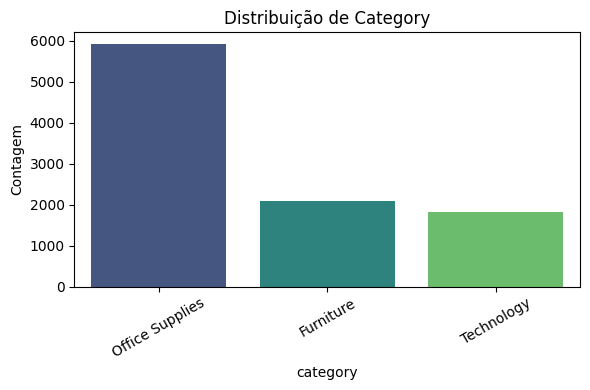

/var/folders/42/25_fl5kd1kd4085h3mqcnsw40000gn/T/ipykernel_74288/1222842897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


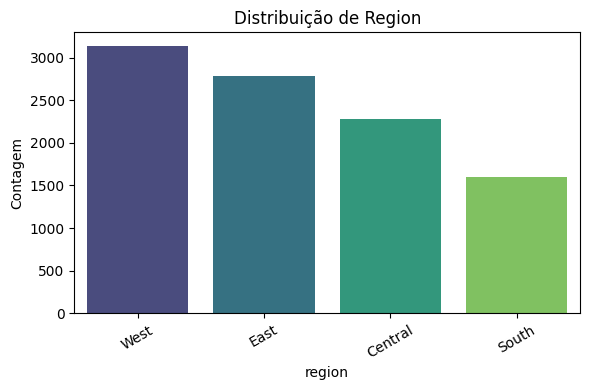

/var/folders/42/25_fl5kd1kd4085h3mqcnsw40000gn/T/ipykernel_74288/1222842897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


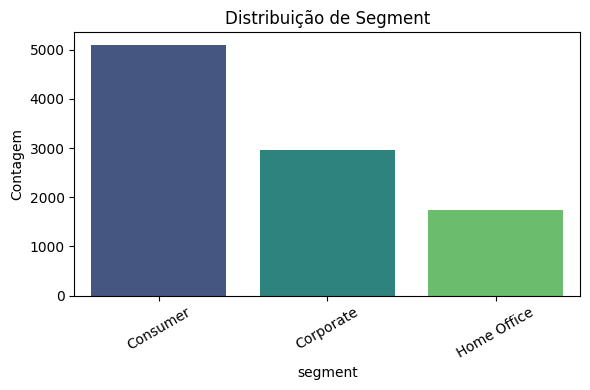

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['category', 'region', 'segment']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de {col.capitalize()}')
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

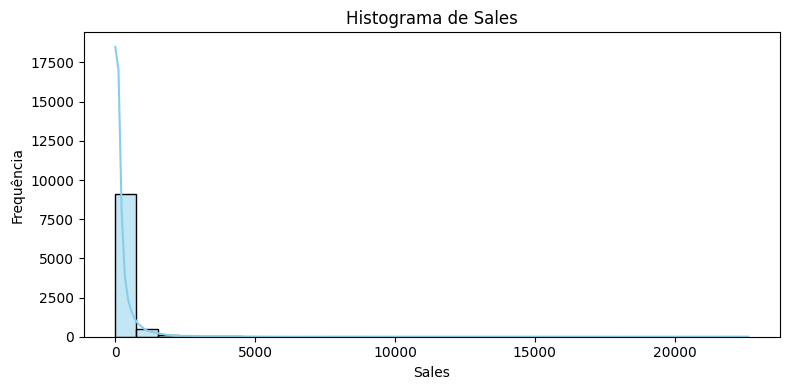

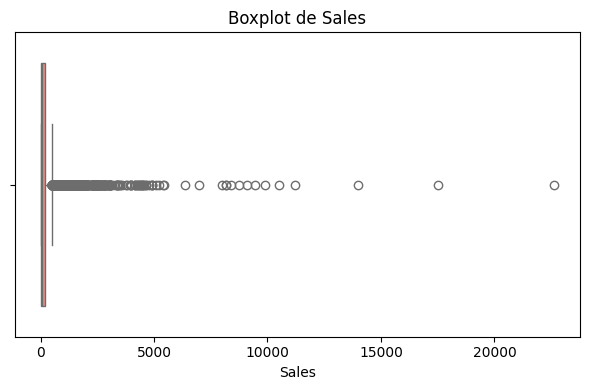

In [9]:
# Histogramas e Boxplots para as variáveis numéricas
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['sales']  # Sales é a principal métrica contínua relevante

for col in numeric_cols:
    # Histograma
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Histograma de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col].dropna(), color='salmon')
    plt.title(f'Boxplot de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.tight_layout()
    plt.show()

# 1. Análise descritiva e exploratória dos dados

## Introdução

O dataset analisado refere-se a transações de vendas, com informações detalhadas sobre pedidos, clientes, produtos, datas, regiões, entre outros atributos. O principal objetivo desta etapa foi compreender suas principais características estruturais, explorar padrões centrais e de dispersão, detectar outliers e iniciar a identificação de possíveis relações entre variáveis.

## Estrutura e limpeza dos dados

A base dispõe de 9.800 registros e 18 colunas, abarcando informações numéricas, categóricas e temporais. Realizou-se padronização dos nomes das colunas (minúsculas, sem espaços) e as datas foram convertidas para o tipo `datetime`. Não há registros duplicados; os únicos valores nulos detectados concentram-se em `postal_code` (apenas 11 casos). Não foi necessário realizar imputação neste estágio.

## Estatísticas descritivas e dispersão

As principais medidas de tendência central e dispersão das variáveis numéricas podem ser sintetizadas conforme a tabela abaixo:

```python
df.describe().T[['mean', '50%', 'std', 'min', '25%', '75%', 'max']]
```

- **Sales**: Média ≈ 230,77; Mediana ≈ 54,49; Desvio padrão elevado (> 626), distribuição bastante assimétrica (mínimo de 0,444 e máximo superior a 22.600).
- **Postal Code**: Não representa valor contínuo; utilizada apenas para localização.

A observação dos boxplots e histogramas revela distribuição fortemente assimétrica para `Sales`, com presença clara de outliers (valores extremos) que correspondem a vendas pouco comuns no conjunto. A maior parte das vendas concentra-se em valores baixos, com cauda longa à direita.

## Variáveis categóricas

As categorias possuem a seguinte frequência:
```python
for col in ['category', 'region', 'segment']:
    print(df[col].value_counts())
```

- **Category**: Office Supplies (60%), Furniture (21%), Technology (19%).
- **Region**: West (32%), East (28%), Central (23%), South (16%).
- **Segment**: Consumer (52%), Corporate (30%), Home Office (18%).

Os gráficos de barras confirmam forte predominância de vendas em Office Supplies e em consumidores finais.

## Visualização e detecção de outliers

Os boxplots e histogramas apresentados evidenciam concentração dos dados de vendas em patamares baixos, com ocorrência de valores atípicos significativos na distribuição de vendas. Há forte assimetria positiva, refletindo grande dispersão e presença de outliers.

## Relações entre variáveis (correlação)

Para uma análise inicial das relações entre variáveis numéricas:
```python
correl = df.corr(numeric_only=True)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
sns.heatmap(correl, annot=True, cmap="coolwarm")
plt.title("Matriz de correlação das variáveis numéricas")
plt.show()
```
Observa-se que:
- Não há correlações fortes entre as variáveis numéricas disponíveis (com destaque apenas para conexões internas de identificação, não de valor preditivo).
- Como o dataset não possui colunas de lucro ou quantidade, a variável de vendas é isolada para análise descritiva, limitando o aprofundamento das relações quantitativas.

## Achados relevantes

- O dataset é composto majoritariamente por vendas de baixo valor, sendo as vendas altas raras e caracterizando cauda longa na distribuição de `Sales`. Isso sugere recomendação explícita de tratar atipicidades e transformar a variável para métodos analíticos futuros.
- Não há problemas estruturais graves: as colunas estão bem definidas, a ausência de dados é restrita e não compromete a análise inicial.
- As categorias 'Office Supplies' e clientes do segmento 'Consumer' são a maioria expressiva das vendas, sugerindo padrão de concentração de mercado que pode ser explorado em análises futuras.
- Não foi identificada, até este ponto, correlação forte entre as variáveis numéricas disponíveis. O padrão identificável é, sobretudo, de dispersão e assimetria em 'Sales'.

## Ferramentas e tecnologias utilizadas

Todas as análises foram desenvolvidas em **Python**, utilizando as seguintes ferramentas:
- **pandas**: para carregamento, limpeza, manipulação e sumarização dos dados.
- **matplotlib** e **seaborn**: para visualização dos dados, boxplots, histogramas, gráficos de barras e mapas de calor.
- **Jupyter Notebook**: ambiente interativo para execução de código e apresentação integrada dos artefatos.

O código implementado nas células do notebook contempla tanto os cálculos estatísticos quanto a visualização dos dados e pode ser referenciado e adaptado para etapas posteriores do projeto.
